In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
import ast
from IPython.display import Image, display
from PIL import Image as PILImage
import requests
from io import BytesIO
import pickle

In [2]:
game_raw = pd.read_csv('./dataset/appstore_games.csv')

In [3]:
game_raw.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


In [4]:
print('Duplicates:',game_raw.Name.duplicated().sum())

Duplicates: 160


In [5]:
game_raw['first_word'] = game_raw['Name'].str.split().str[0]

In [6]:
game_raw = game_raw.drop_duplicates(subset='first_word', keep=False)

In [7]:
del game_raw['Subtitle']
del game_raw['Average User Rating']
del game_raw['User Rating Count']
del game_raw['In-app Purchases']
del game_raw['Languages']
del game_raw['Size']
del game_raw['Price']
del game_raw['Original Release Date']
del game_raw['Current Version Release Date']
del game_raw['Age Rating']
del game_raw['Primary Genre']
del game_raw['Developer']

In [8]:
game_raw.isnull().sum()

URL            0
ID             0
Name           0
Icon URL       0
Description    0
Genres         0
first_word     0
dtype: int64

In [9]:
game_raw = game_raw.dropna()

In [10]:
game_raw['Genres'] = game_raw['Genres'].str.split(n=1).str[1]

In [11]:
game_raw = game_raw.drop_duplicates(subset='first_word', keep=False)

In [12]:
game_raw = game_raw.drop(columns=['first_word'])

In [13]:
game_raw.head()

,URL,ID,Name,Icon URL,Description,Genres
6,https://apps.apple.com/us/app/gravitation/id28...,286313771,Gravitation,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,"""Gravitation is a new implementation of the pu...","Entertainment, Puzzle, Strategy"
8,https://apps.apple.com/us/app/carte/id286566987,286566987,Carte,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,"""Jeu simple qui consiste \xe0 trouver comment ...","Strategy, Board, Entertainment"
9,https://apps.apple.com/us/app/barrels-o-fun/id...,286682679,"""Barrels O' Fun""",https://is4-ssl.mzstatic.com/image/thumb/Purpl...,Barrels O\u2019 Fun is a simple but challengin...,"Casual, Strategy"
10,https://apps.apple.com/us/app/quaddraxx/id2875...,287563734,Quaddraxx,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,Quaddraxx-Logic \u2013 Challenge your brain!\n...,"Entertainment, Strategy, Puzzle"
11,https://apps.apple.com/us/app/lumen-lite/id288...,288096268,Lumen Lite,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,"""The objective of Lumen is to light up all the...","Puzzle, Strategy"


In [14]:
game_raw.shape

(4852, 6)

In [15]:
game_raw['tags']= game_raw['Genres']+ ' '+ game_raw['Description']

In [16]:
game_raw['serial_number'] = range(0, len(game_raw))

In [17]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(game_raw['tags'])

In [18]:
# cosine_sim = cosine_similarity(combined_features, combined_features)
cosine_sim = cosine_similarity(pd.DataFrame(tfidf_matrix.toarray()), pd.DataFrame(tfidf_matrix.toarray()))


In [19]:
sorted(list(enumerate(cosine_sim[0])),key=lambda x: x[1], reverse=True)[0:25]

[(0, 0.9999999999999998),
 (3989, 0.2814488475561007),
 (873, 0.27777445204488405),
 (1752, 0.26712832290643196),
 (24, 0.2512154105466545),
 (1095, 0.2463453505703515),
 (3988, 0.2440417850779517),
 (3222, 0.2409783357891735),
 (4230, 0.2381493409041551),
 (3670, 0.2377878894830256),
 (223, 0.23769306178977692),
 (3527, 0.23601893279921157),
 (671, 0.23574699156075163),
 (1734, 0.2344789798273783),
 (4024, 0.23393336434996506),
 (2659, 0.23314079478215066),
 (1763, 0.2330745842134014),
 (2506, 0.23225560007473356),
 (2570, 0.23143523094340276),
 (2455, 0.23136802561034997),
 (1807, 0.23098684380404483),
 (1418, 0.2309853292322615),
 (469, 0.22950015004409452),
 (275, 0.225729815975829),
 (141, 0.22503000157836786)]

In [20]:
game_raw[game_raw['serial_number'] == 0].head()

,URL,ID,Name,Icon URL,Description,Genres,tags,serial_number
6,https://apps.apple.com/us/app/gravitation/id28...,286313771,Gravitation,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,"""Gravitation is a new implementation of the pu...","Entertainment, Puzzle, Strategy","Entertainment, Puzzle, Strategy ""Gravitation i...",0


In [22]:
def game_recommendation(game):
    movie_id = game_raw.loc[game_raw['Name'] == game, 'serial_number'].values[0]
    similarity_list = cosine_sim[movie_id]
    final_games = sorted(list(enumerate(similarity_list)),key=lambda x: x[1], reverse=True)[1:7]
    for i in final_games:
        print(game_raw.loc[game_raw['serial_number']==i[0],'Name'].values[0])
        image_url = game_raw.loc[game_raw['serial_number']==i[0],'Icon URL'].values
        response = requests.get(image_url[0])
        image_data = BytesIO(response.content)
        img = PILImage.open(image_data)
        img = img.resize((150, 150))
        display(img)

!Ball Shots - Premium


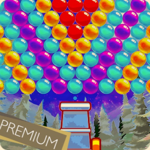

Clolr Linez 10x10-Five Or More


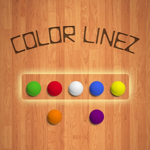

Have a Ball


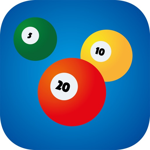

Paintball II


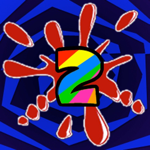

Flimsy Logic


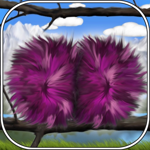

5eiry : Premium.


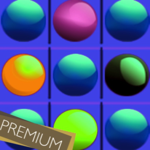

In [23]:
game_recommendation('Gravitation')

In [24]:
pickle.dump(game_raw.to_dict(), open('games_full_list.pkl', 'wb'))

In [25]:
pickle.dump(cosine_sim,open('cosine_sim.pkl','wb'))